In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lazypredict
from lazypredict.Supervised import LazyRegressor


sns.set()

loading dataset


In [3]:
data = pd.read_excel('flighttrain.xlsx')
pd.set_option('display.max_columns', None)



In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


basic info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


null or empty shells

In [6]:
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

removing null values

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

DATA ANALYSIS 

Retrieving day and month of journey 

In [9]:
data["Journey_Day"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.day
data["Journey_Month"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.month


In [10]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5


In [11]:
# Now we no more need 'Date_of_Journey' column, so let's drop it
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

Same goes for the dep_time(plane leaving time) and Arrival_Time(Plane arrives)

In [12]:
data["Dep_Hr"] = pd.to_datetime(data.Dep_Time).dt.hour
data["Dep_Min"] = pd.to_datetime(data.Dep_Time).dt.minute


data["Arrival_Hr(24hr formate)"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_Min"] = pd.to_datetime(data.Arrival_Time).dt.minute

droping the Dep_Time column

In [13]:
data.drop(["Dep_Time"], axis = 1, inplace = True)
data.drop(["Arrival_Time"], axis = 1, inplace = True)



In [14]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


 Duration is the time taken by the plane to reach the destination.
 It is basically the difference between Arrival and Departure time.
 Now here we will be writing custom code to extract hours and minutes from 'Duration' column just like we did in previously 

In [15]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if(len(duration[i].split())!=2):
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+ duration[i]
          
for i in range(len(duration)):
    duration[i] = duration[i].split(" ")      
    

In [16]:
duration_hr = []
duration_min = []
for i in range(len(duration)):  
   duration_hr.append( int(duration[i][0].split("h")[0]))
   duration_min.append( int(duration[i][1].split("m")[0]))

In [17]:
# Let's add 'duration hours' and 'duration minute' to our dataset
data["duration_hours"] = duration_hr
data["duration_minutes"] = duration_min

In [18]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [19]:
# Let's drop our 'Duration' column
data.drop(["Duration"], axis = 1, inplace = True)
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


categoriacal data

In [20]:
data["Airline"].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

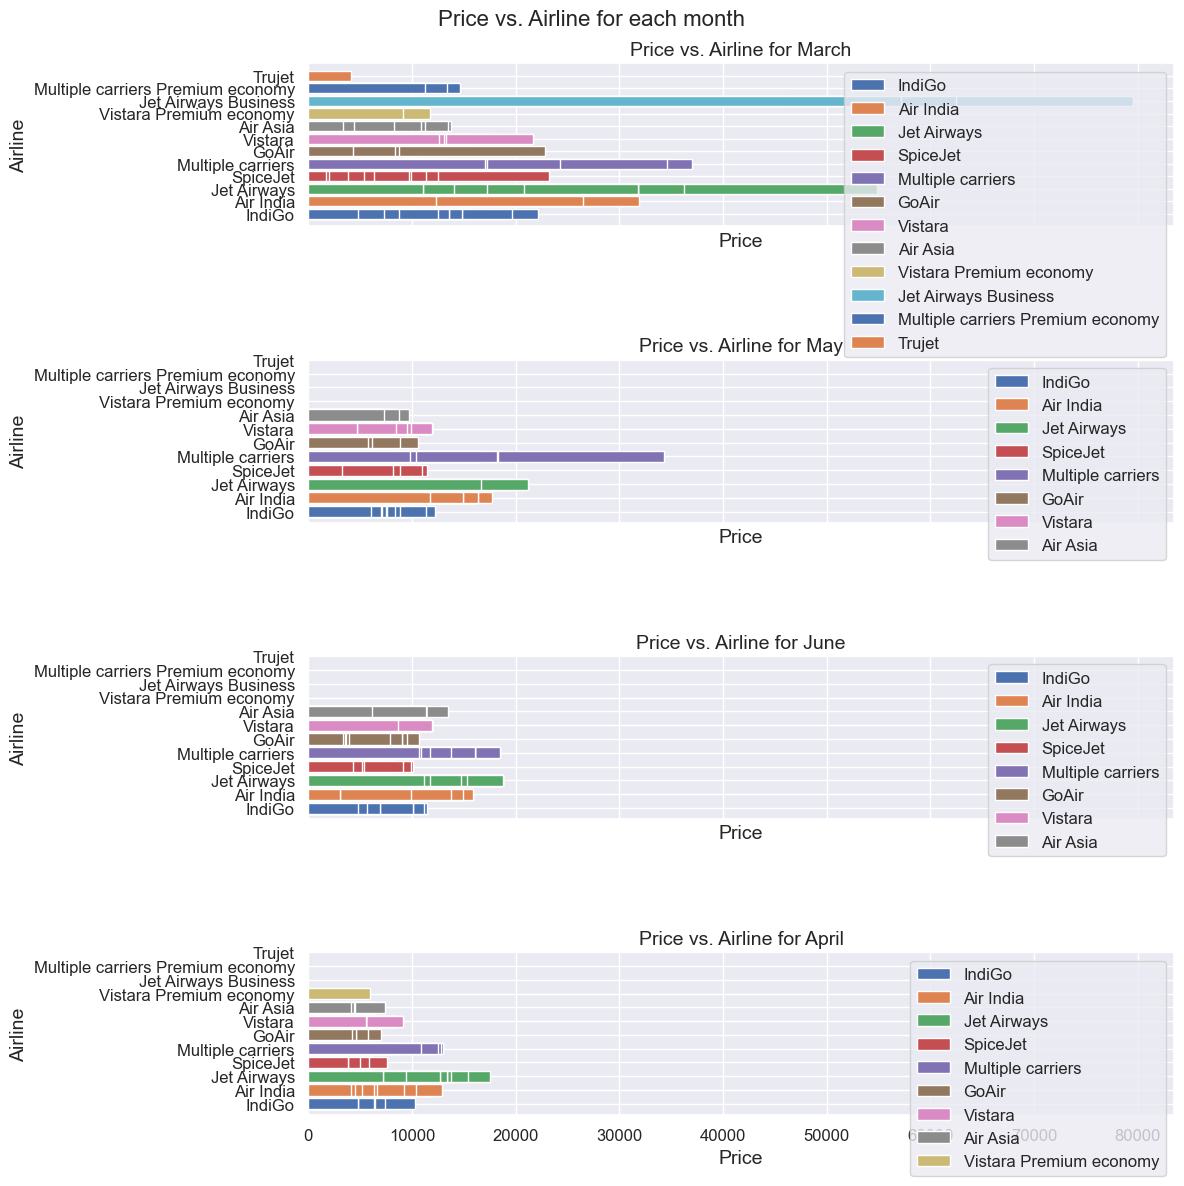

In [21]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
# Create a bar plot for each airline using the price for each month
airlines = data['Airline'].unique()
months = data['Journey_Month'].unique()

fig, axs = plt.subplots(len(months), 1, figsize=(12, 3*len(months)), sharex=True)

for i, month in enumerate(months):
    for j, airline in enumerate(airlines):
        airline_data = data[(data['Airline'] == airline) & (data['Journey_Month'] == month)]
        if len(airline_data) > 0:
            axs[i].barh(j, airline_data['Price'], height=0.8, label=airline)
            axs[i].set_title(f'Price vs. Airline for {month_names[month]}', fontsize=14)
            axs[i].set_yticks(range(len(airlines)))
            axs[i].set_yticklabels(airlines)
            axs[i].tick_params(labelsize=12)
    axs[i].set_xlabel('Price', fontsize=14)
    axs[i].set_ylabel('Airline', fontsize=14)
    axs[i].legend(fontsize=12)
    
plt.suptitle('Price vs. Airline for each month', fontsize=16)
plt.tight_layout()
plt.show()


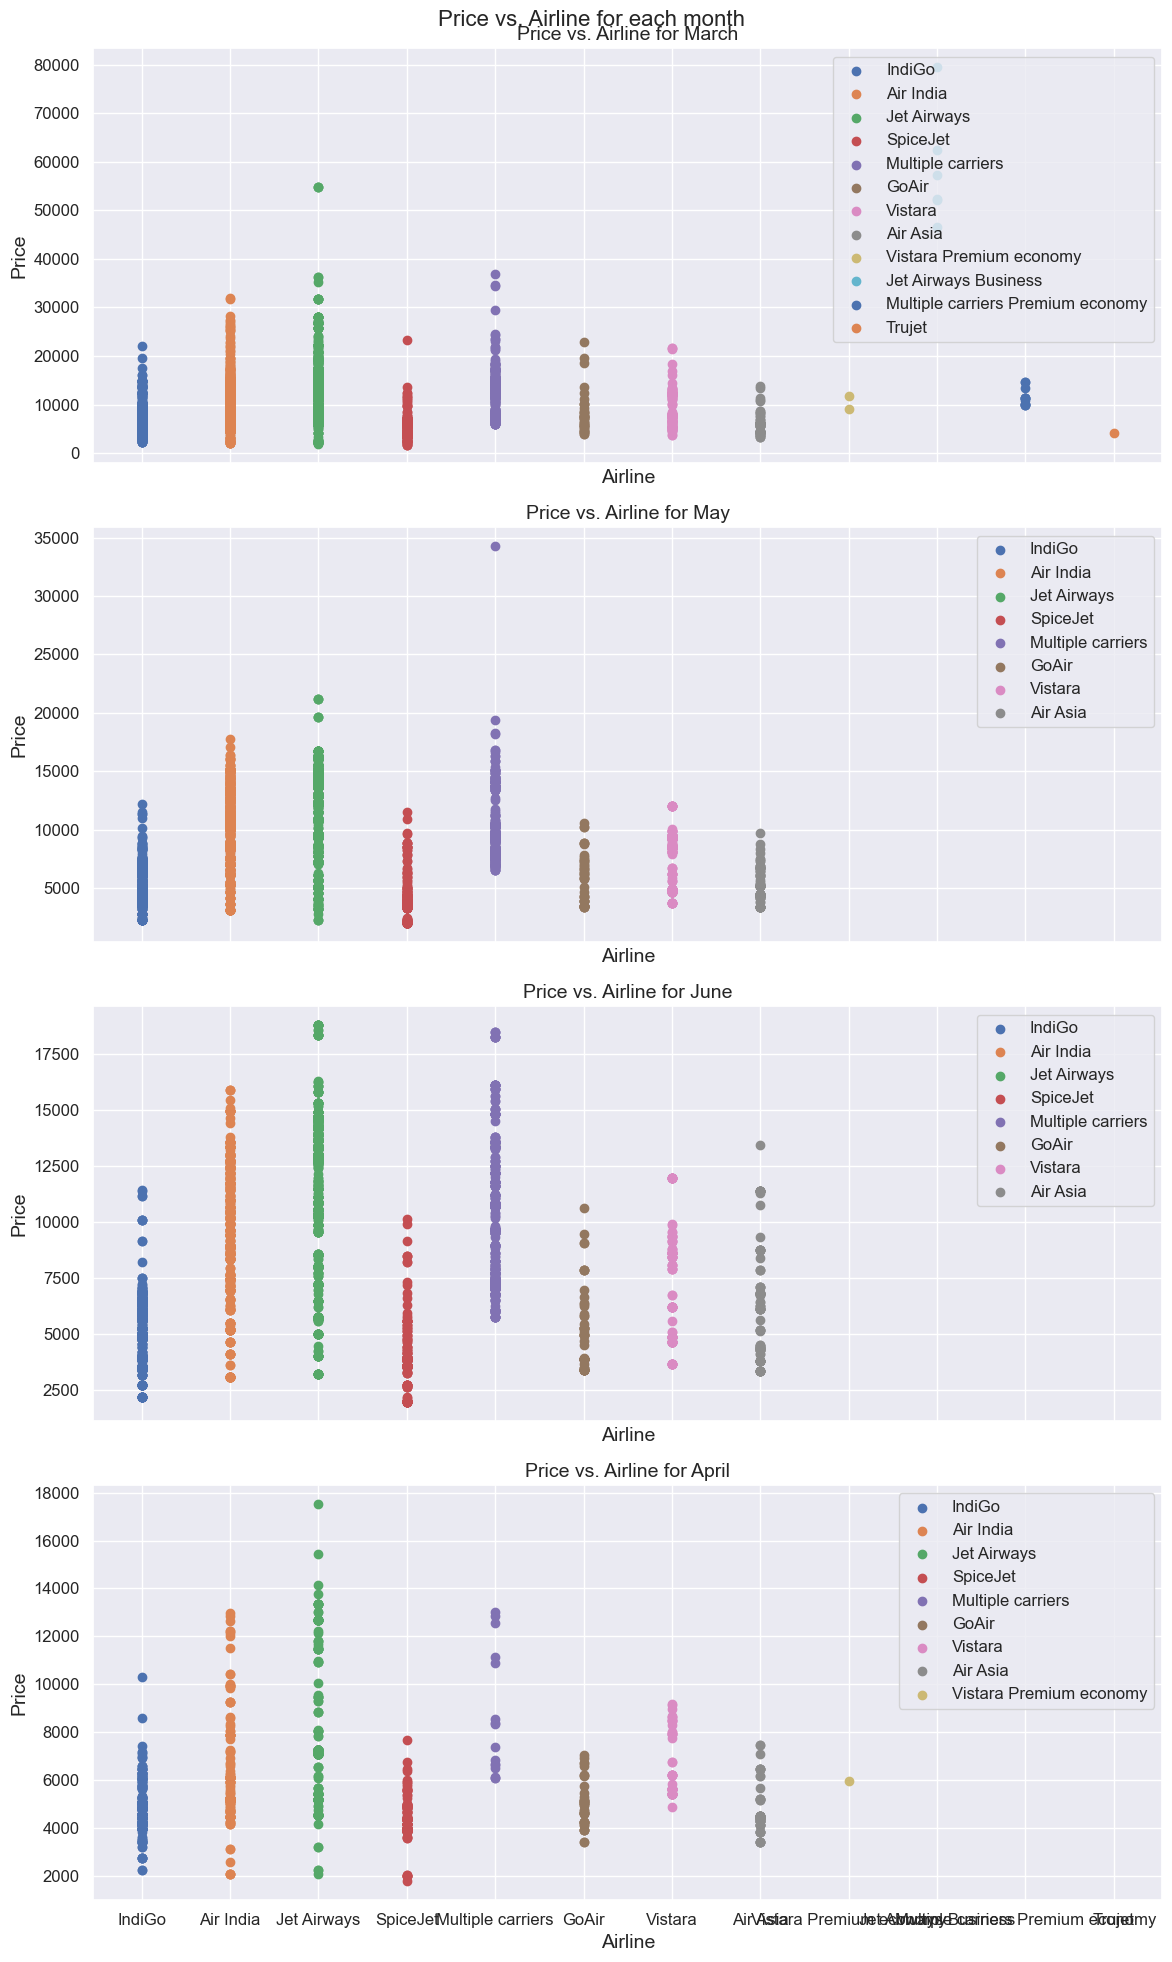

In [22]:
# Create a scatter plot for each month using the price and airline
airlines = data['Airline'].unique()
months = data['Journey_Month'].unique()

fig, axs = plt.subplots(len(months), 1, figsize=(12, 5*len(months)), sharex=True)

for i, month in enumerate(months):
    for j, airline in enumerate(airlines):
        airline_data = data[(data['Airline'] == airline) & (data['Journey_Month'] == month)]
        if len(airline_data) > 0:
            axs[i].scatter(airline_data['Airline'], airline_data['Price'], label=airline)
            axs[i].set_title(f'Price vs. Airline for {month_names[month]}', fontsize=14)
            axs[i].tick_params(labelsize=12)
    axs[i].set_xlabel('Airline', fontsize=14)
    axs[i].set_ylabel('Price', fontsize=14)
    axs[i].legend(fontsize=12)
    
plt.suptitle('Price vs. Airline for each month', fontsize=16)
plt.tight_layout()
plt.show()


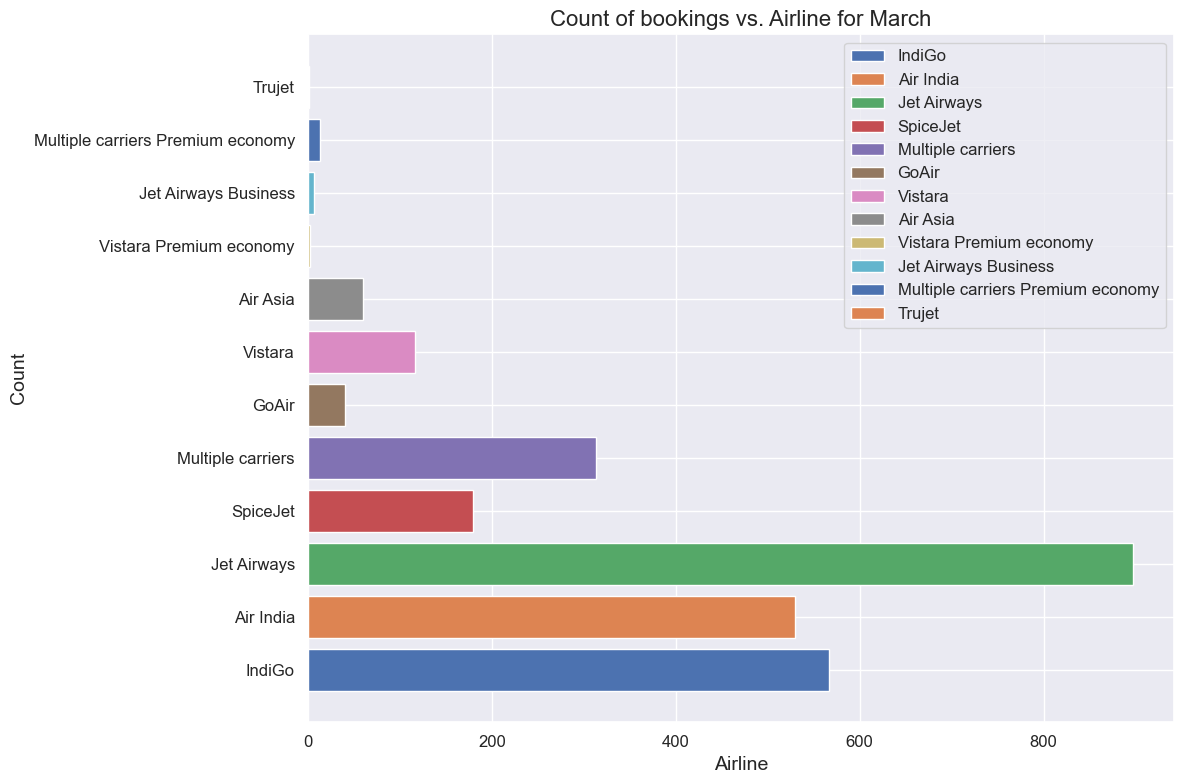

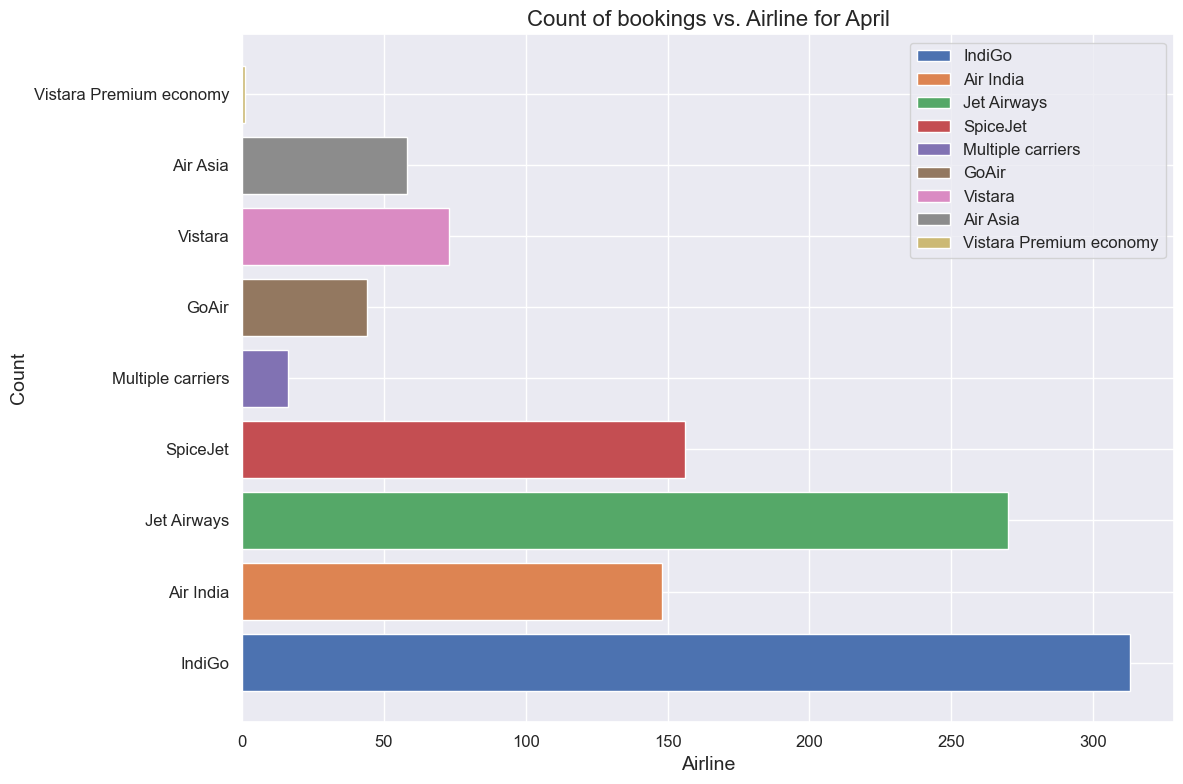

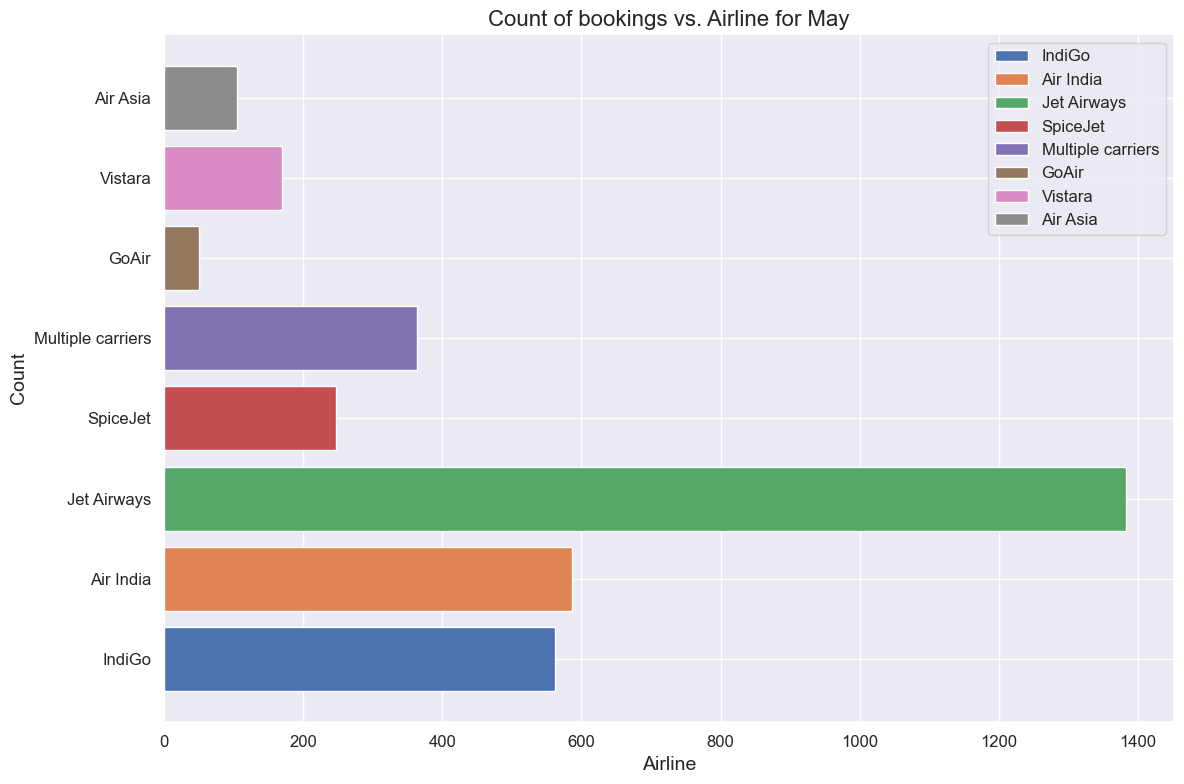

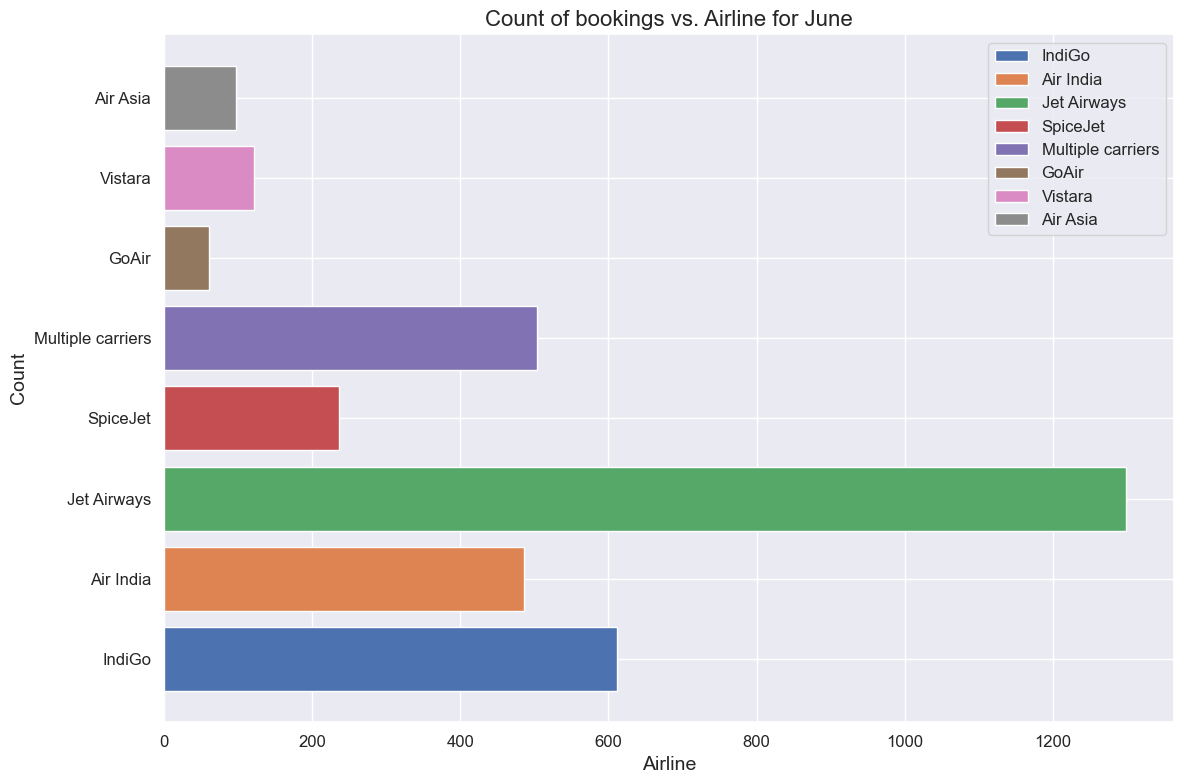

In [23]:


# Define a mapping dictionary for month names
month_names = {
    
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    
}

# Loop over all the months
for month in range(3, 7):
    # Create a bar plot for each airline using the count of bookings for the given month
    airlines = data['Airline'].unique()
    fig, axs = plt.subplots(figsize=(12, 8))

    for airline in airlines:
        airline_data = data[(data['Airline'] == airline) & (data['Journey_Month'] == month)]
        count = len(airline_data)
        if count > 0:
            axs.barh(airline, count, label=airline)

    axs.set_title(f'Count of bookings vs. Airline for {month_names[month]}', fontsize=16)
    axs.set_xlabel('Airline', fontsize=14)
    axs.set_ylabel('Count', fontsize=14)
    axs.tick_params(labelsize=12)
    axs.legend(fontsize=12)

    plt.tight_layout()
    plt.show()


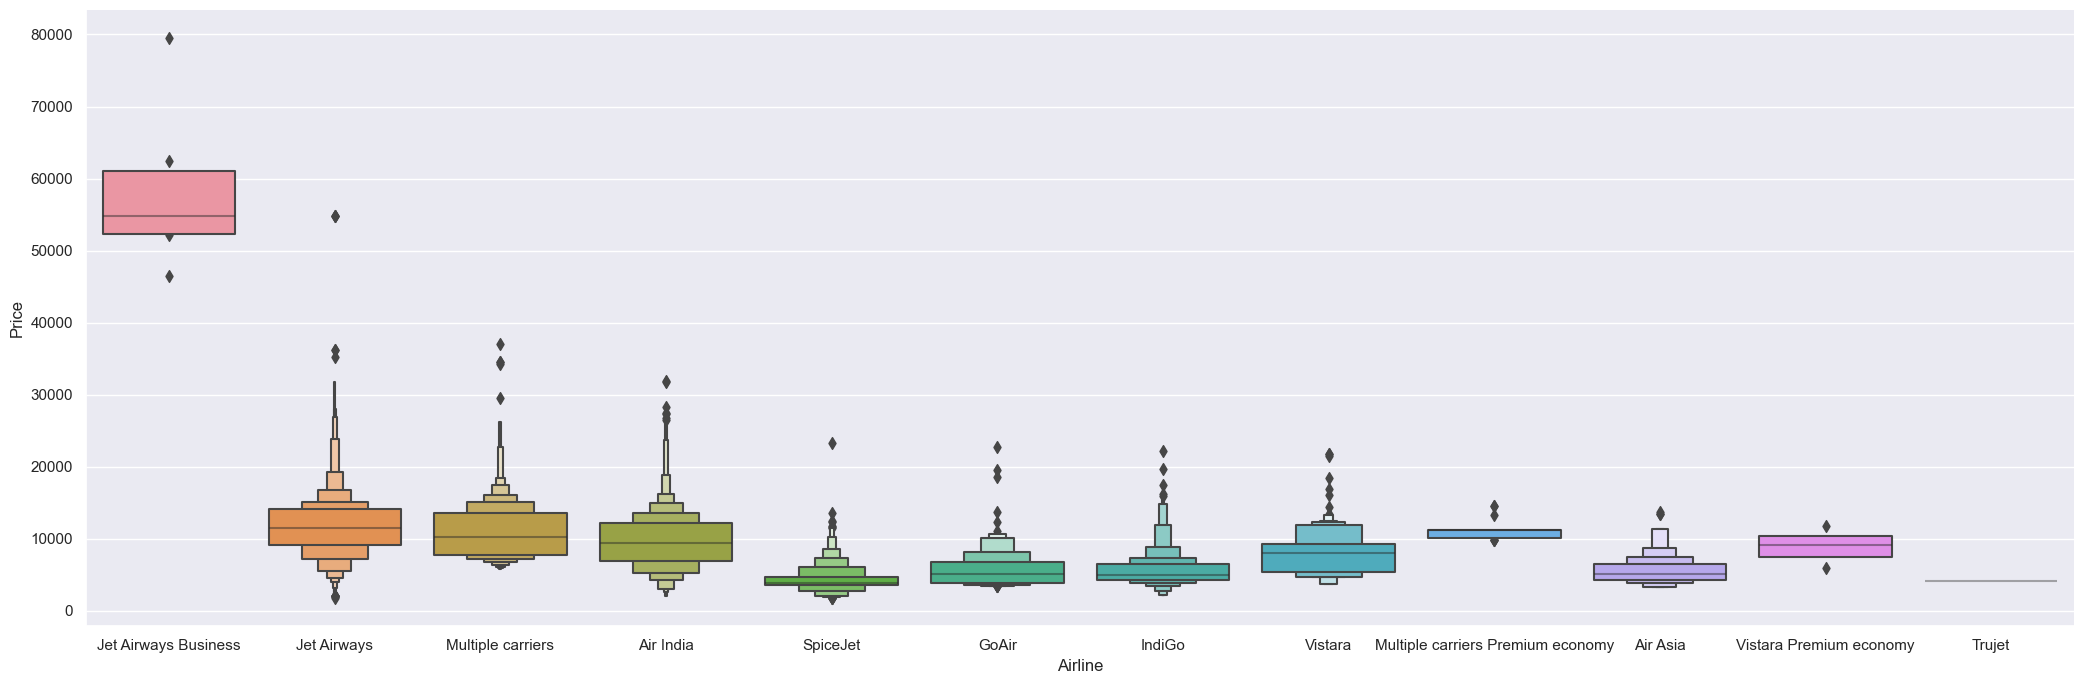

In [24]:
sns.catplot(y= 'Price', x= 'Airline', data = data.sort_values("Price", ascending = False), kind = "boxen", height = 7, aspect = 3)


* As from plot you can see that the 'Jet Airways Business' has the highest flight rate as compared to other airways flight rates.
* We can consider it as an outlier with respect to being an highest price in terms of flight rate as compared to other flight rates.

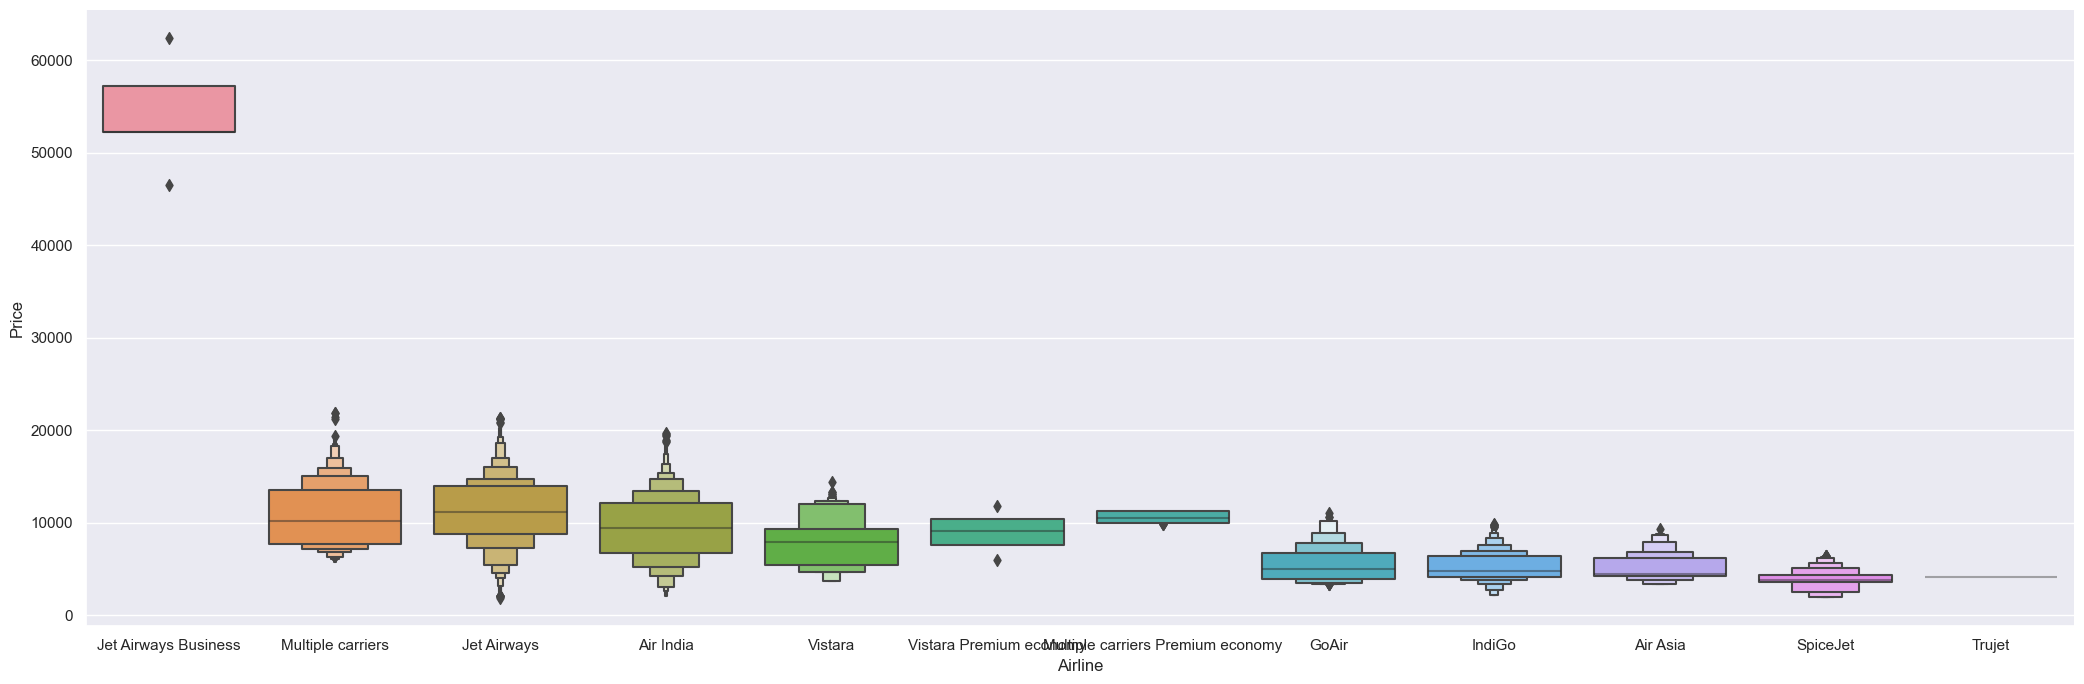

In [25]:

for airline in data['Airline'].unique():
    # Calculate the 25th and 75th percentiles of the airline prices
    percentile25 = data[data['Airline']==airline]['Price'].quantile(0.25)
    percentile75 = data[data['Airline']==airline]['Price'].quantile(0.75)

    # Calculate the interquartile range (IQR) and the upper and lower limits for the outliers
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR

    # Filter the data to only include flights for the current airline with prices above the upper limit
    outliers_h = data[(data['Airline']==airline) & (data['Price'] > upper_limit)]

    # Check if outliers_h is empty before attempting to drop it
    if not outliers_h.empty:
        data = data.drop(outliers_h.index)

    # Filter the data to only include flights for the current airline with prices below the lower limit
    outliers_l = data[(data['Airline']==airline) & (data['Price'] < lower_limit)]

    # Check if outliers_l is empty before attempting to drop it
    if not outliers_l.empty:
        data = data.drop(outliers_l.index)



# print(data['Airline'].unique())

sns.catplot(y= 'Price', x= 'Airline', data = data.sort_values("Price", ascending = False), kind = "boxen", height = 7, aspect = 3)



In [26]:
Airline = data[['Airline']]
Airline = pd.get_dummies(Airline )

In [27]:
Airline

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
data["Source"].value_counts()


Delhi       4413
Kolkata     2822
Banglore    2068
Mumbai       677
Chennai      374
Name: Source, dtype: int64

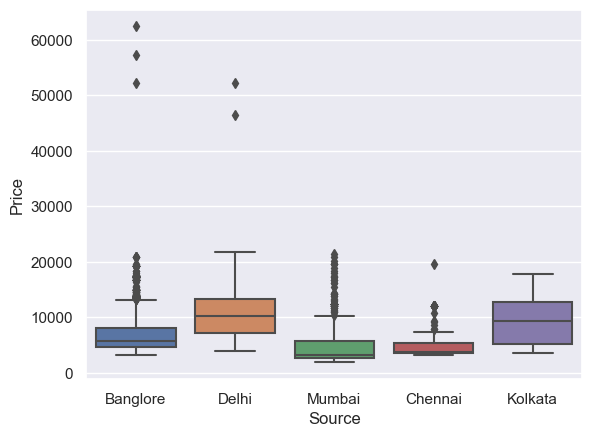

In [29]:
# Source Vs. Price
sns.boxplot(y = 'Price', x = 'Source', data = data.sort_values("Price",ascending=False))
plt.show()

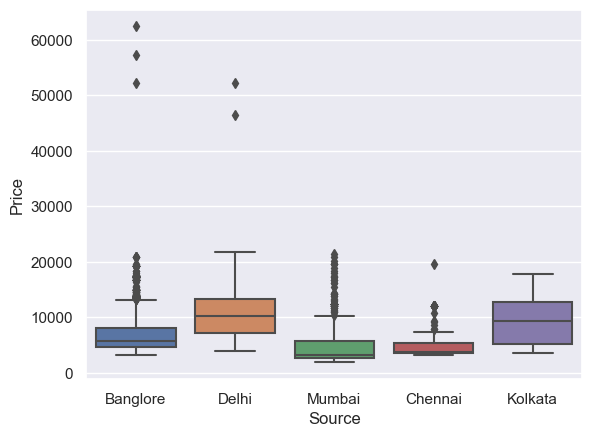

In [30]:
sns.boxplot(y = 'Price', x = 'Source', data = data.sort_values("Price",ascending=False))
plt.show()

banglore has outliers

In [31]:
Source = data[['Source']]
Source = pd.get_dummies(Source)

In [32]:
Source

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [33]:
data["Destination"].value_counts()


Cochin       4413
Banglore     2822
Delhi        1265
New Delhi     803
Hyderabad     677
Kolkata       374
Name: Destination, dtype: int64

In [34]:
Destination = data[['Destination']]
Destination = pd.get_dummies(Destination)

In [35]:
Destination

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
5,1,0,0,0,0,0
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


* Route =  <b>BLR → NAG → DEL</b> : This basically indicates that from source to destination there are total <b>2 stops</b>.
* Total_Stops = <b>2 stops</b> : This information from "Toal_Stops" column says the same thing that from source to destination there are total <b>2 stops</b>.


So basically, its completely fine to drop the column "Route" as "Total_Stops" column is already doing our job.
Even <b>"Additional_Info"</b> column contains most of the values which are _No Info_ so we can even drop that column too

In [36]:
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [37]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


## Dealing with Ordinal Data


In [38]:
data[['Total_Stops', 'Price']]


,Total_Stops,Price
0,non-stop,3897
1,2 stops,7662
2,2 stops,13882
3,1 stop,6218
5,non-stop,3873
...,...,...
10678,non-stop,4107
10679,non-stop,4145
10680,non-stop,7229
10681,non-stop,12648


In [39]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data


,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


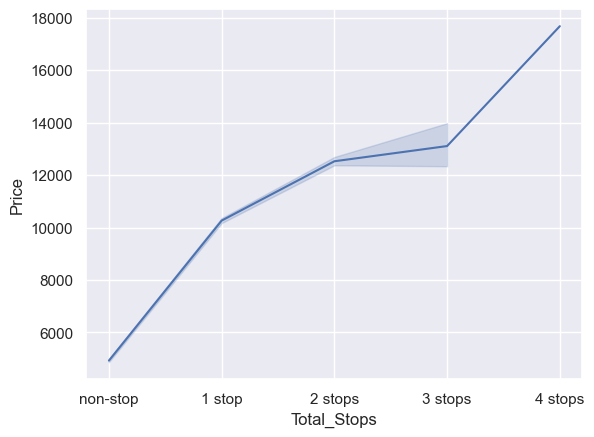

In [40]:
# create line plot
sns.lineplot(x=data['Total_Stops'], y=data['Price'], data=data)

# set new xticks
plt.xticks([0, 1, 2, 3,4],["non-stop","1 stop","2 stops","3 stops","4 stops"])

# show plot
plt.show()


As per our observation here we can see that when the flight has no stops, the fare rates decreases on the other side when flight has 1 or more than one stop, the rates gradually increases.

This means that the data in <b>'Total_Stops'</b> column is in ordered manner. So we are going to label encode the values here.

In [41]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [42]:
datatrain = pd.concat([data, Airline, Source, Destination], axis = 1)


In [43]:
datatrain.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [44]:
# datatrain.fillna(datatrain.median, inplace=True)

datatrain

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


## Preprocessing w.r.to Test Dataset

Here we are going to repeat all the preprocessing steps which we did for our training set, 

In [45]:
datatest = pd.read_excel('flighttest.xlsx')
pd.set_option('display.max_columns', None)


In [46]:
datatest.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [48]:
datatest.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [49]:
datatest["Journey_Day"] = pd.to_datetime(datatest.Date_of_Journey, format = "%d/%m/%Y").dt.day
datatest["Journey_Month"] = pd.to_datetime(datatest.Date_of_Journey, format = "%d/%m/%Y").dt.month
datatest.drop(["Date_of_Journey"], axis = 1, inplace = True)

datatest.head(10)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,12,6
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info,12,3
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info,1,5
8,IndiGo,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info,15,3
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info,18,5


In [50]:
datatest["Dep_Hr"] = pd.to_datetime(datatest.Dep_Time).dt.hour
datatest["Dep_Min"] = pd.to_datetime(datatest.Dep_Time).dt.minute


datatest["Arrival_Hr(24hr formate)"] = pd.to_datetime(datatest.Arrival_Time).dt.hour
datatest["Arrival_Min"] = pd.to_datetime(datatest.Arrival_Time).dt.minute
datatest.drop(["Dep_Time"], axis = 1, inplace = True)
datatest.drop(["Arrival_Time"], axis = 1, inplace = True)



In [51]:
duration = list(datatest["Duration"])

for i in range(len(duration)):
    if(len(duration[i].split())!=2):
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+ duration[i]
          
for i in range(len(duration)):
    duration[i] = duration[i].split(" ")      
    
duration_hr = []
duration_min = []
for i in range(len(duration)):  
   duration_hr.append( int(duration[i][0].split("h")[0]))
   duration_min.append( int(duration[i][1].split("m")[0]))
# Let's add 'duration hours' and 'duration minute' to our dataset
datatest["duration_hours"] = duration_hr
datatest["duration_minutes"] = duration_min
datatest.head(5)
# Let's drop our 'Duration' column
datatest.drop(["Duration"], axis = 1, inplace = True)
datatest

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15,15


In [52]:
datatest["Airline"].value_counts()


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [53]:
Airline = datatest[['Airline']]
Airline = pd.get_dummies(Airline )
Source = datatest[['Source']]
Source = pd.get_dummies(Source)
Destination = datatest[['Destination']]
Destination = pd.get_dummies(Destination)
datatest.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [54]:
datatest.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
datatest


,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1,6,3,4,0,19,15,15,15


In [55]:
final_testing_data =  pd.concat([datatest, Airline, Source, Destination], axis = 1)
final_testing_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
final_testing_data


,Total_Stops,Journey_Day,Journey_Month,Dep_Hr,Dep_Min,Arrival_Hr(24hr formate),Arrival_Min,duration_hours,duration_minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


## Feature Selection

In [56]:
from sklearn.feature_selection import VarianceThreshold as V
dt = datatrain.loc[:,'Total_Stops':'Destination_New Delhi']
v_m  = V(threshold=0)
v_m.fit(dt)
v_m.get_support()



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [57]:
datatrain.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hr',
       'Dep_Min', 'Arrival_Hr(24hr formate)', 'Arrival_Min', 'duration_hours',
       'duration_minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## Splitting Data into X and Y datasets

In [58]:
X = datatrain.loc[:, ['Total_Stops',  'Journey_Day', 'Journey_Month', 'Dep_Hr',
       'Dep_Min', 'Arrival_Hr(24hr formate)', 'Arrival_Min', 'duration_hours',
       'duration_minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]


In [59]:
X.shape

(10354, 31)

In [60]:
X.dropna(inplace=True)

In [61]:
y = datatrain['Price']

In [62]:
y.dropna(inplace=True)

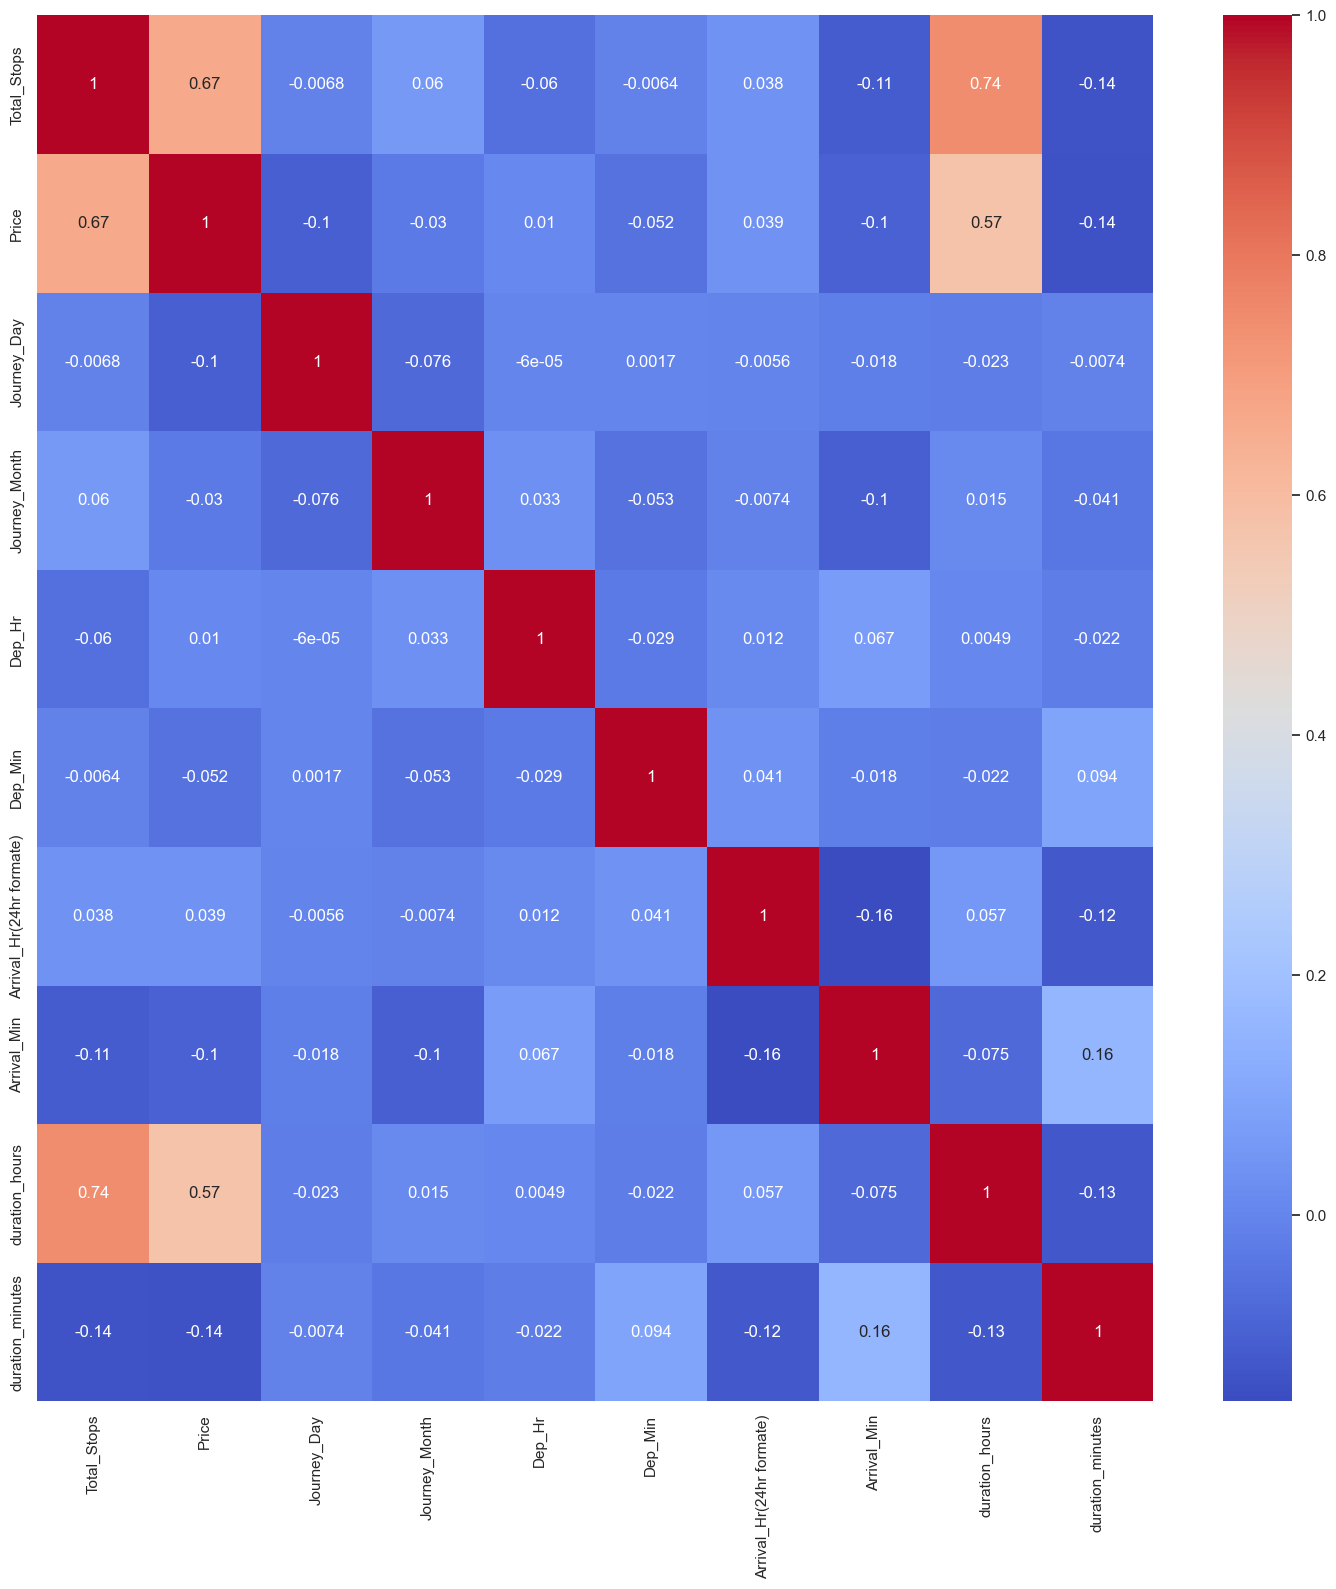

In [63]:
# Let's Find Co-relation between Dependent and Independent Features
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [64]:

# Taking Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[2.49945826e-01 7.59606272e-02 5.99109274e-02 2.65912472e-02
 2.47827101e-02 2.27730503e-02 1.81667507e-02 1.45356978e-01
 1.54922696e-02 4.11068424e-03 3.28938276e-02 3.72523678e-03
 4.09394272e-02 1.53627181e-01 4.84127724e-02 5.93957956e-04
 5.13759932e-03 1.39337658e-04 7.60914364e-03 1.86381323e-04
 3.44519132e-03 6.20487193e-04 5.19506945e-03 2.83264765e-03
 8.03403811e-03 2.95761026e-03 5.38854822e-03 1.80023177e-02
 7.68343909e-03 4.62534036e-04 9.02218169e-03]


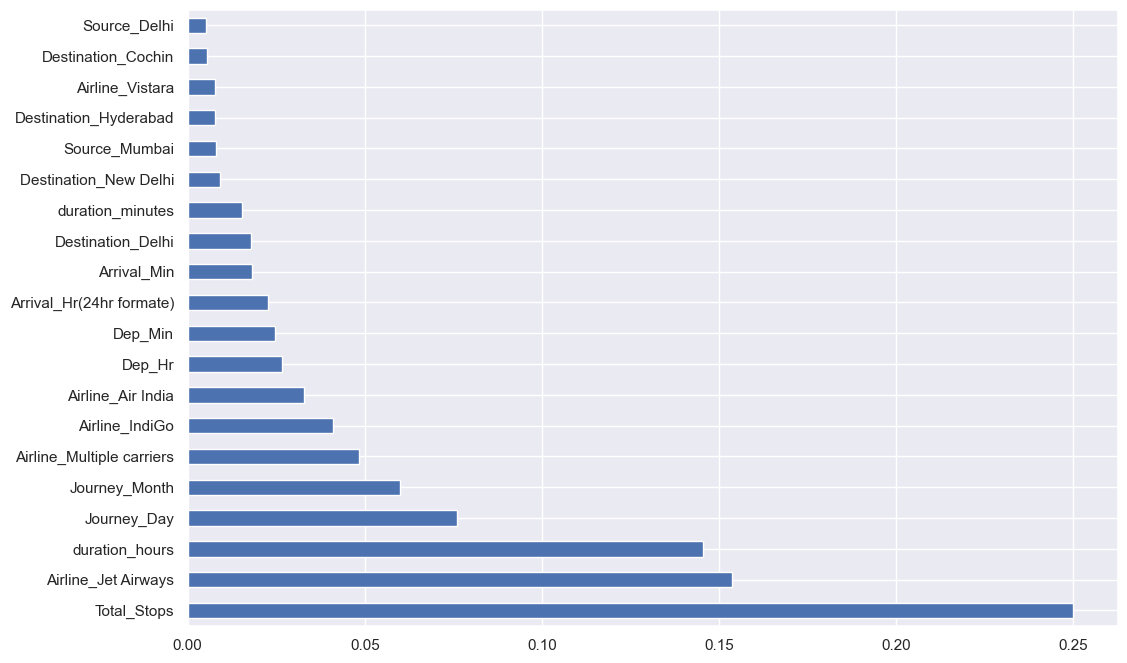

In [66]:
# Feature importances grapgh for better visualization
plt.figure(figsize = (12, 8))
featimportances = pd.Series(selection.feature_importances_, index = X.columns)
featimportances.nlargest(20).plot(kind = 'barh')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
# lazypredict.Supervised.REGRESSORS

In [69]:
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[:30]
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

In [70]:
# fit selected models
clf = LazyRegressor(verbose=100,ignore_warnings=True, custom_metric=None)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models,predictions = clf.fit(x_train, x_test, y_train, y_test)
predictions

  3%|▎         | 1/30 [00:00<00:14,  2.02it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5565499423557068, 'Adjusted R-Squared': 0.5498079355940722, 'RMSE': 2870.825661472335, 'Time taken': 0.4949512481689453}


 17%|█▋        | 5/30 [00:00<00:03,  7.93it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.7426713170838533, 'Adjusted R-Squared': 0.7387590124392233, 'RMSE': 2186.8981658807925, 'Time taken': 0.2574911117553711}
{'Model': 'BayesianRidge', 'R-Squared': 0.7219658559139043, 'Adjusted R-Squared': 0.7177387551455526, 'RMSE': 2273.1784394268093, 'Time taken': 0.04124164581298828}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6331403973694975, 'Adjusted R-Squared': 0.6275628359758998, 'RMSE': 2611.165550635564, 'Time taken': 0.04538989067077637}
{'Model': 'DummyRegressor', 'R-Squared': -3.8602656699637805e-05, 'Adjusted R-Squared': -0.01524272069610988, 'RMSE': 4311.147124426246, 'Time taken': 0.018227577209472656}
{'Model': 'ElasticNet', 'R-Squared': 0.5870314159461563, 'Adjusted R-Squared': 0.58075283521753, 'RMSE': 2770.403129196086, 'Time taken': 0.026769638061523438}


 23%|██▎       | 7/30 [00:00<00:02,  9.80it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.44420388272725153, 'Adjusted R-Squared': 0.4357538191492941, 'RMSE': 3213.97294088319, 'Time taken': 0.10573911666870117}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6894176165522836, 'Adjusted R-Squared': 0.684695667613157, 'RMSE': 2402.552413992669, 'Time taken': 0.03579545021057129}


 33%|███▎      | 10/30 [00:03<00:07,  2.53it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7973506397198814, 'Adjusted R-Squared': 0.794269653859811, 'RMSE': 1940.6940766586915, 'Time taken': 2.097181558609009}
{'Model': 'GammaRegressor', 'R-Squared': 0.550508675344539, 'Adjusted R-Squared': 0.5436748199917585, 'RMSE': 2890.3146143152453, 'Time taken': 0.16316795349121094}


 37%|███▋      | 11/30 [00:18<01:10,  3.69s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.806571090699848, 'Adjusted R-Squared': -7.940462068537855, 'RMSE': 12793.456135039909, 'Time taken': 14.775776624679565}


 40%|████      | 12/30 [00:19<00:54,  3.03s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7119039682177979, 'Adjusted R-Squared': 0.707523891226504, 'RMSE': 2313.945361935242, 'Time taken': 0.993614912033081}


 43%|████▎     | 13/30 [00:20<00:42,  2.51s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8051618496223816, 'Adjusted R-Squared': 0.8021996217353261, 'RMSE': 1902.9240756811712, 'Time taken': 1.0408689975738525}


 50%|█████     | 15/30 [00:20<00:21,  1.41s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7121697314928508, 'Adjusted R-Squared': 0.7077936950417858, 'RMSE': 2312.8778297272597, 'Time taken': 0.21590328216552734}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7703633066648278, 'Adjusted R-Squared': 0.7668720180461959, 'RMSE': 2065.880061117826, 'Time taken': 0.1659693717956543}


 53%|█████▎    | 16/30 [00:25<00:32,  2.32s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.546387916594611, 'Adjusted R-Squared': -3.6155090668714296, 'RMSE': 9192.162773012355, 'Time taken': 4.603018760681152}
{'Model': 'Lars', 'R-Squared': 0.7217408449640488, 'Adjusted R-Squared': 0.7175103232347135, 'RMSE': 2274.0980865390684, 'Time taken': 0.18839168548583984}


 60%|██████    | 18/30 [00:25<00:15,  1.27s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6222587444491359, 'Adjusted R-Squared': 0.6165157435064793, 'RMSE': 2649.6082754085282, 'Time taken': 0.2036728858947754}


 63%|██████▎   | 19/30 [00:25<00:10,  1.03it/s]

{'Model': 'Lasso', 'R-Squared': 0.6960344595483934, 'Adjusted R-Squared': 0.6914131099878246, 'RMSE': 2376.8218853205144, 'Time taken': 0.24808239936828613}


 73%|███████▎  | 22/30 [00:26<00:03,  2.02it/s]

{'Model': 'LassoCV', 'R-Squared': 0.6729390308975691, 'Adjusted R-Squared': 0.6679665492682532, 'RMSE': 2465.4648851673405, 'Time taken': 0.5599956512451172}
{'Model': 'LassoLars', 'R-Squared': 0.6290420985719385, 'Adjusted R-Squared': 0.6234022285649401, 'RMSE': 2625.7101003489947, 'Time taken': 0.05099916458129883}
{'Model': 'LassoLarsCV', 'R-Squared': 0.6290420985719385, 'Adjusted R-Squared': 0.6234022285649401, 'RMSE': 2625.7101003489947, 'Time taken': 0.11003899574279785}


 83%|████████▎ | 25/30 [00:26<00:01,  3.66it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.6290420985719385, 'Adjusted R-Squared': 0.6234022285649401, 'RMSE': 2625.7101003489947, 'Time taken': 0.054451942443847656}
{'Model': 'LinearRegression', 'R-Squared': 0.7222224801791541, 'Adjusted R-Squared': 0.7179992810058112, 'RMSE': 2272.1291305031414, 'Time taken': 0.03789114952087402}
{'Model': 'LinearSVR', 'R-Squared': 0.07739156006550274, 'Adjusted R-Squared': 0.0633646539164251, 'RMSE': 4140.885036616169, 'Time taken': 0.04596066474914551}
{'Model': 'MLPRegressor', 'R-Squared': 0.5788916602339305, 'Adjusted R-Squared': 0.5724893264758392, 'RMSE': 2797.57271092237, 'Time taken': 6.627226829528809}


 97%|█████████▋| 29/30 [00:40<00:01,  1.63s/it]

{'Model': 'NuSVR', 'R-Squared': 0.07623506459807117, 'Adjusted R-Squared': 0.06219057563413799, 'RMSE': 4143.479536500929, 'Time taken': 6.8740394115448}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5538423320328749, 'Adjusted R-Squared': 0.5470591600333747, 'RMSE': 2879.576644773501, 'Time taken': 0.03042745590209961}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5792886913547458, 'Adjusted R-Squared': 0.5728923938716645, 'RMSE': 2796.2535903401094, 'Time taken': 0.1095876693725586}


100%|██████████| 30/30 [00:40<00:00,  1.35s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6023363806389372, 'Adjusted R-Squared': 0.5962904894176557, 'RMSE': 2718.581719417952, 'Time taken': 0.08690381050109863}


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.80,0.81,1902.92,1.04
ExtraTreesRegressor,0.79,0.80,1940.69,2.10
KNeighborsRegressor,0.77,0.77,2065.88,0.17
BaggingRegressor,0.74,0.74,2186.90,0.26
LinearRegression,0.72,0.72,2272.13,0.04
BayesianRidge,0.72,0.72,2273.18,0.04
Lars,0.72,0.72,2274.10,0.19
HuberRegressor,0.71,0.71,2312.88,0.22
GradientBoostingRegressor,0.71,0.71,2313.95,0.99


In [72]:
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [73]:
# from sklearn.ensemble import ExtraTreesRegressor
# rfr = ExtraTreesRegressor()
# rfr.fit(x_train, y_train)
from sklearn.ensemble import HistGradientBoostingRegressor

# Instantiate the regressor
rfr = HistGradientBoostingRegressor()

# Fit the regressor to the training data
rfr.fit(x_train, y_train)




HistGradientBoostingRegressor()

In [74]:
ypredict = rfr.predict(x_test)

In [75]:
rfr.score(x_train, y_train)


0.8788451711407327

In [76]:
rfr.score(x_test, y_test)

0.8616985749935672

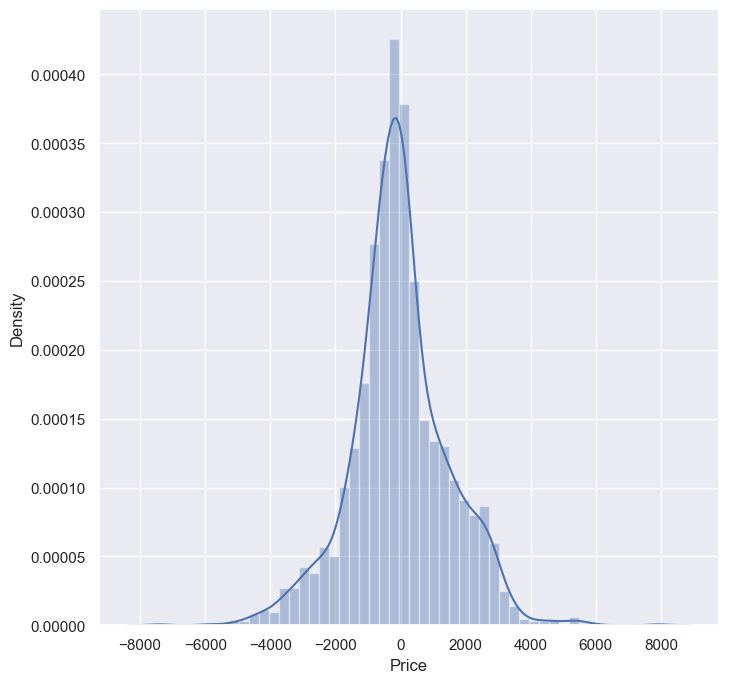

In [77]:
# Plotting graph to see the results
plt.figure(figsize = (8, 8))
plt.xticks(range(-10000, 10001, 2000))

sns.distplot(y_test - ypredict)
plt.show()

As per graph, it is forming an Gaussian Distribution which shows a good sign in terms of our results.

## Perfomance Metrics
Now let's see the performance metrics to get more idea about our model performance

In [78]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypredict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypredict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypredict)))

Mean Absolute Error: 1099.2393506884869
Mean Squared Error: 2242361.064451653
Root Mean Squared Error: 1497.4515232392844


In [79]:
metrics.r2_score(y_test, ypredict)

0.8616985749935672

## Hyperparameter Tuning
* Now we are going to use RandomizedSearchCV for our hyperparameter tuning.
* We can also consider using GridSearchCV but RandomizedSearchCV is pretty fast so we're going to use that.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# No. of trees in RandomForest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]

# No. of features in every Split
max_features = ['auto', 'sqrt']

# Max no. of levels in tree
max_depth = [int(x) for x in np.linspace (5, 50, num =10)]

# Min no. of samples reqd. to split a tree
min_samples_split = [5, 10, 15,20]

# Max no. of samples reqd. at each leaf node
min_samples_leaf = [1,2,3,4,5]

In [81]:
# # Creating the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf
#               }
import numpy as np


random_grid = {'learning_rate':[round(x,3) for x in np.linspace(start = 0.1, stop = 1, num = 100)],
               'max_depth': [int(x) for x in np.linspace (5, 50, num =10)],

               'max_leaf_nodes': [None, 5, 10, 15],
               'min_samples_leaf': [1,2,3,4,5],
               'l2_regularization': np.linspace(0, 0.1, 100),
               'max_bins': [255, 512, 1024]}


In [82]:
# # Random search of parameters using 5 fold cross validation
rfrandom = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 40, cv = 5, verbose = 10, n_jobs = 1)

In [83]:
rfrandom.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START l2_regularization=0.05555555555555555, learning_rate=0.282, max_bins=1024, max_depth=20, max_leaf_nodes=10, min_samples_leaf=5
[CV 1/5; 1/40] END l2_regularization=0.05555555555555555, learning_rate=0.282, max_bins=1024, max_depth=20, max_leaf_nodes=10, min_samples_leaf=5;, score=nan total time=   0.0s
[CV 2/5; 1/40] START l2_regularization=0.05555555555555555, learning_rate=0.282, max_bins=1024, max_depth=20, max_leaf_nodes=10, min_samples_leaf=5
[CV 2/5; 1/40] END l2_regularization=0.05555555555555555, learning_rate=0.282, max_bins=1024, max_depth=20, max_leaf_nodes=10, min_samples_leaf=5;, score=nan total time=   0.0s
[CV 3/5; 1/40] START l2_regularization=0.05555555555555555, learning_rate=0.282, max_bins=1024, max_depth=20, max_leaf_nodes=10, min_samples_leaf=5
[CV 3/5; 1/40] END l2_regularization=0.05555555555555555, learning_rate=0.282, max_bins=1024, max_depth=20, max_leaf_nodes=10, min_samples_l

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingRegressor(), n_iter=40,
                   n_jobs=1,
                   param_distributions={'l2_regularization': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
       0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
       0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
       0.0202020...
                                        'learning_rate': [0.1, 0.109, 0.118,
                                                          0.127, 0.136, 0.145,
                                                          0.155, 0.164, 0.173,
                                                          0.182, 0.191, 0.2,
                                                          0.209, 0.218, 0.227,
                                                          0.236, 0.245, 0.255,
                                                          0.264, 0.273, 0.282,
                                                          0.291, 0.3, 0.309,
                                                          0.318, 0.327, 0.336,
                                                          0.345, 0.355, 0.364, ...],
                                        'max_bins': [255, 512, 1024],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_leaf_nodes': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5]},
                   scoring='neg_mean_squared_error', verbose=10)

In [84]:
rfrandom.best_params_

{'min_samples_leaf': 5,
 'max_leaf_nodes': 15,
 'max_depth': 45,
 'max_bins': 255,
 'learning_rate': 0.245,
 'l2_regularization': 0.0808080808080808}

In [85]:
# Use the best hyperparameters to train a new random forest model
# from sklearn.ensemble import RandomForestRegressor
rfr_best = HistGradientBoostingRegressor(**rfrandom.best_params_)
rfr_best.fit(x_train, y_train)


HistGradientBoostingRegressor(l2_regularization=0.0808080808080808,
                              learning_rate=0.245, max_depth=45,
                              max_leaf_nodes=15, min_samples_leaf=5)

In [97]:
# Let's do some prediction
prediction = rfr_best.predict(x_test)
Training_Score =rfr_best.score(x_train,y_train)
Test_Score =rfr_best.score(x_test,y_test)


# print(x_test)


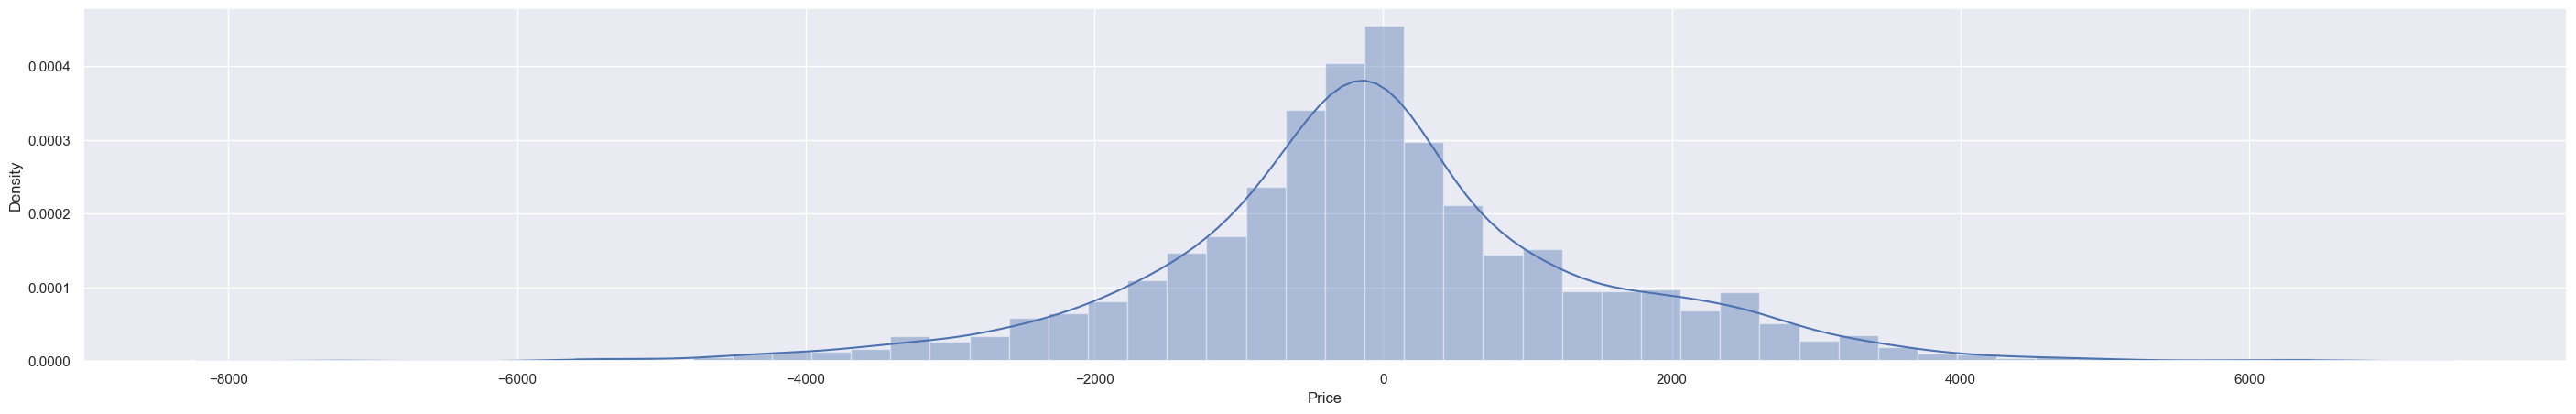

In [87]:
plt.figure(figsize = (35, 5))
plt.xticks(range(-8000, 8000, 2000))
sns.distplot(y_test - prediction)
plt.show()

In [88]:
## Perormance Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1094.7171061411402
Mean Squared Error: 2260228.381114864
Root Mean Squared Error: 1503.405594347335


## Saving our pickle Model for later use

In [89]:
import pickle
# Open file where you want to save model
file = open('flightpredict_rf1.pkl', 'wb')

# Dumping information to file
pickle.dump(rfrandom, file)

In [90]:
model = open('flightpredict_rf1.pkl', 'rb')
forest = pickle.load(model)

In [91]:
y_prediction = forest.predict(x_test)
y_prediction

array([14637.26820551,  4533.39966299,  4907.27374247, ...,
        7176.75255301,  4046.91963273, 12606.43583038])

In [92]:
metrics.r2_score(y_test, y_prediction)

0.8605965779090042

[15129, 4226, 8040, 5281, 3543, 9486, 4878, 13555, 13029, 6015, 7174, 12080, 4544, 2754, 10676, 13376, 8040, 11260, 6027, 5277, 16736, 8610, 10844, 13067, 11087, 12778, 12384, 16108, 3625, 6528, 11474, 6717, 7102, 15812, 5386, 14571, 17703, 13587, 8446, 12395, 12898, 4441, 10178, 3383, 2017, 14151, 8565, 3597, 6478, 4823, 8586, 4777, 13759, 6582, 4148, 10991, 3925, 11664, 9899, 4823, 13899, 10577, 11134, 10262, 7452, 9001, 4995, 10467, 6121, 12927, 12604, 11087, 9296, 10199, 10151, 8040, 13029, 15554, 7229, 15129, 10844, 10031, 5963, 7530, 11432, 13941, 14714, 6451, 10454, 14714, 4483, 13764, 4049, 8016, 9564, 14143, 7438, 15129, 3873, 14151, 13502, 15129, 3850, 9187, 14178, 13169, 19644, 8824, 8576, 3807, 5088, 13941, 6961, 13292, 14388, 13941, 6296, 7155, 9413, 6587, 10262, 13843, 10262, 7229, 9663, 6643, 11913, 13029, 13377, 8855, 4777, 6442, 7662, 14151, 3859, 7738, 16736, 10031, 14714, 4778, 7757, 7229, 10844, 12242, 13437, 2754, 5769, 5192, 6795, 6478, 7480, 13817, 12224, 6216, 4

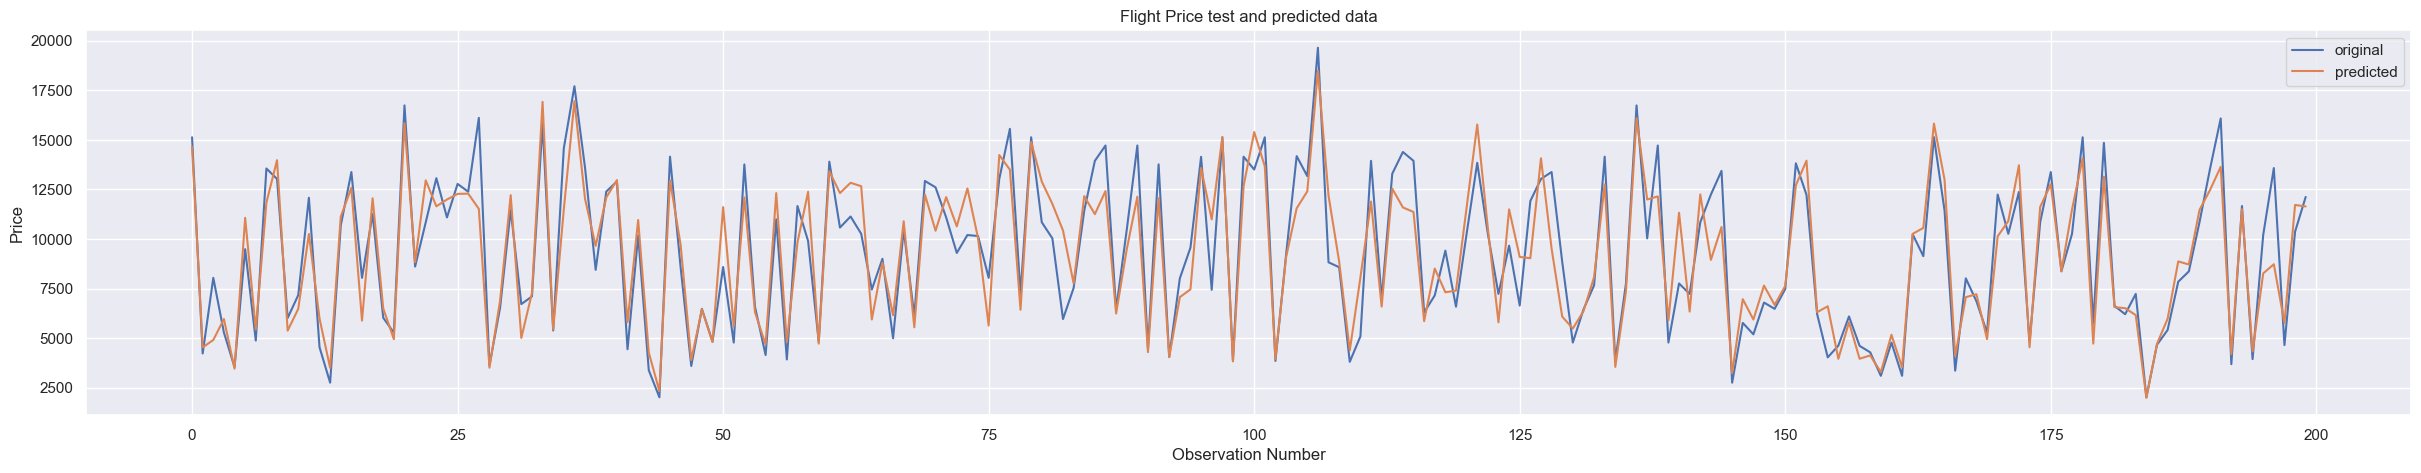

In [93]:
number_of_observations=200
plt.figure(figsize = (30, 5))
actual = list(y_test[:number_of_observations])
predicted = list(y_prediction[:number_of_observations])


x_ax = range(len(y_test[:number_of_observations]))
print(actual,predicted)
plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, y_prediction[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')


plt.legend()

In [94]:
print(list(y_test))

[15129, 4226, 8040, 5281, 3543, 9486, 4878, 13555, 13029, 6015, 7174, 12080, 4544, 2754, 10676, 13376, 8040, 11260, 6027, 5277, 16736, 8610, 10844, 13067, 11087, 12778, 12384, 16108, 3625, 6528, 11474, 6717, 7102, 15812, 5386, 14571, 17703, 13587, 8446, 12395, 12898, 4441, 10178, 3383, 2017, 14151, 8565, 3597, 6478, 4823, 8586, 4777, 13759, 6582, 4148, 10991, 3925, 11664, 9899, 4823, 13899, 10577, 11134, 10262, 7452, 9001, 4995, 10467, 6121, 12927, 12604, 11087, 9296, 10199, 10151, 8040, 13029, 15554, 7229, 15129, 10844, 10031, 5963, 7530, 11432, 13941, 14714, 6451, 10454, 14714, 4483, 13764, 4049, 8016, 9564, 14143, 7438, 15129, 3873, 14151, 13502, 15129, 3850, 9187, 14178, 13169, 19644, 8824, 8576, 3807, 5088, 13941, 6961, 13292, 14388, 13941, 6296, 7155, 9413, 6587, 10262, 13843, 10262, 7229, 9663, 6643, 11913, 13029, 13377, 8855, 4777, 6442, 7662, 14151, 3859, 7738, 16736, 10031, 14714, 4778, 7757, 7229, 10844, 12242, 13437, 2754, 5769, 5192, 6795, 6478, 7480, 13817, 12224, 6216, 4

In [95]:
print(list(y_prediction))


[14637.26820550744, 4533.399662994209, 4907.273742468473, 5964.822192083285, 3461.5955084013463, 11066.886281115232, 5429.290495731915, 11835.578794093894, 13972.893045346082, 5376.566792039279, 6478.88312790437, 10253.553199239053, 5994.147467963268, 3495.2205805007575, 11123.838288789748, 12581.626780106395, 5883.496782959064, 12053.281370333727, 6493.628924705964, 4948.042963675287, 15840.814135944589, 8829.581709516206, 12957.39899409222, 11647.547355442151, 11989.807406249838, 12274.018274994814, 12286.997127658995, 11518.846266395127, 3510.402285290769, 6886.895374539484, 12208.680865860606, 5011.2183784671115, 7270.1455720233935, 16917.70076743104, 5438.8847700461365, 11487.598022312613, 16954.093487932885, 12020.82837032247, 9653.821639824668, 12095.103593493242, 12972.595072507824, 5800.570972929024, 10957.826296082822, 4273.791403599256, 2335.5101148117556, 12960.221104578017, 9701.115992949868, 3901.456724292174, 6454.352232956463, 4802.051619615777, 11607.231563640715, 5586

In [98]:
# print(x_test)